# ARC-AGI Raw Data Exploration

Exploring the ARC-AGI dataset from raw JSON files.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter
from pathlib import Path

## 1. Load Raw Data

ARC-AGI 1 consists of three splits:
- **Training**: 400 puzzles for training/development
- **Evaluation**: 400 puzzles for evaluation
- **Concept**: 160 puzzles covering specific concepts

In [2]:
DATA_DIR = Path('../kaggle/combined')

def load_split(split_name):
    """Load challenges and solutions for a split."""
    with open(DATA_DIR / f'arc-agi_{split_name}_challenges.json') as f:
        challenges = json.load(f)
    with open(DATA_DIR / f'arc-agi_{split_name}_solutions.json') as f:
        solutions = json.load(f)
    return challenges, solutions

# Load all ARC-AGI 1 splits
train_challenges, train_solutions = load_split('training')
eval_challenges, eval_solutions = load_split('evaluation')
concept_challenges, concept_solutions = load_split('concept')

print('=== Dataset Summary ===')
print(f'Training:   {len(train_challenges):4d} puzzles')
print(f'Evaluation: {len(eval_challenges):4d} puzzles')
print(f'Concept:    {len(concept_challenges):4d} puzzles')
print(f'Total:      {len(train_challenges) + len(eval_challenges) + len(concept_challenges):4d} puzzles')

=== Dataset Summary ===
Training:    400 puzzles
Evaluation:  400 puzzles
Concept:     160 puzzles
Total:       960 puzzles


## 2. Data Structure

Each puzzle contains:
- `train`: List of demonstration examples (input/output pairs)
- `test`: List of test examples (input only in challenges, output in solutions)

In [3]:
# Examine a single puzzle
puzzle_ids = list(train_challenges.keys())
sample_id = puzzle_ids[0]
sample_puzzle = train_challenges[sample_id]

print(f'Puzzle ID: {sample_id}')
print(f'Keys: {list(sample_puzzle.keys())}')
print(f'Number of train examples: {len(sample_puzzle["train"])}')
print(f'Number of test examples: {len(sample_puzzle["test"])}')

Puzzle ID: 007bbfb7
Keys: ['test', 'train']
Number of train examples: 5
Number of test examples: 1


In [4]:
# Examine a train example structure
example = sample_puzzle['train'][0]
print('Train example keys:', list(example.keys()))
print()
print('Input (raw):')
for row in example['input']:
    print(' ', row)
print()
print('Output (raw):')
for row in example['output']:
    print(' ', row)

Train example keys: ['input', 'output']

Input (raw):
  [0, 7, 7]
  [7, 7, 7]
  [0, 7, 7]

Output (raw):
  [0, 0, 0, 0, 7, 7, 0, 7, 7]
  [0, 0, 0, 7, 7, 7, 7, 7, 7]
  [0, 0, 0, 0, 7, 7, 0, 7, 7]
  [0, 7, 7, 0, 7, 7, 0, 7, 7]
  [7, 7, 7, 7, 7, 7, 7, 7, 7]
  [0, 7, 7, 0, 7, 7, 0, 7, 7]
  [0, 0, 0, 0, 7, 7, 0, 7, 7]
  [0, 0, 0, 7, 7, 7, 7, 7, 7]
  [0, 0, 0, 0, 7, 7, 0, 7, 7]


In [5]:
# Examine test example and solution
test_example = sample_puzzle['test'][0]
test_solution = train_solutions[sample_id][0]

print('Test input:')
for row in test_example['input']:
    print(' ', row)
print()
print('Test solution (from solutions file):')
for row in test_solution:
    print(' ', row)

Test input:
  [7, 0, 7]
  [7, 0, 7]
  [7, 7, 0]

Test solution (from solutions file):
  [7, 0, 7, 0, 0, 0, 7, 0, 7]
  [7, 0, 7, 0, 0, 0, 7, 0, 7]
  [7, 7, 0, 0, 0, 0, 7, 7, 0]
  [7, 0, 7, 0, 0, 0, 7, 0, 7]
  [7, 0, 7, 0, 0, 0, 7, 0, 7]
  [7, 7, 0, 0, 0, 0, 7, 7, 0]
  [7, 0, 7, 7, 0, 7, 0, 0, 0]
  [7, 0, 7, 7, 0, 7, 0, 0, 0]
  [7, 7, 0, 7, 7, 0, 0, 0, 0]


## 3. ARC Color Palette

ARC uses 10 colors (0-9) with a specific visual encoding.

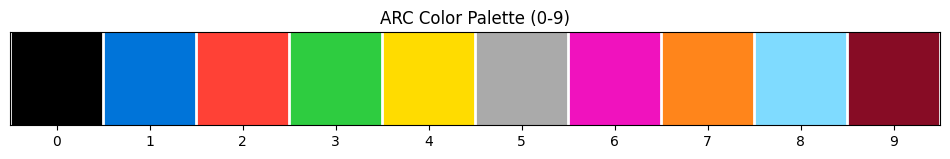

In [6]:
# ARC color palette
ARC_COLORS = [
    '#000000',  # 0: black
    '#0074D9',  # 1: blue
    '#FF4136',  # 2: red
    '#2ECC40',  # 3: green
    '#FFDC00',  # 4: yellow
    '#AAAAAA',  # 5: gray
    '#F012BE',  # 6: magenta
    '#FF851B',  # 7: orange
    '#7FDBFF',  # 8: cyan
    '#870C25',  # 9: maroon
]

ARC_CMAP = ListedColormap(ARC_COLORS)

# Display the color palette
fig, ax = plt.subplots(figsize=(12, 1.5))
colors = np.arange(10).reshape(1, 10)
ax.imshow(colors, cmap=ARC_CMAP, vmin=0, vmax=9, aspect='equal')
ax.set_xticks(range(10))
ax.set_xticklabels([f'{i}' for i in range(10)])
ax.set_yticks([])
ax.set_title('ARC Color Palette (0-9)')
for i in range(11):
    ax.axvline(i - 0.5, color='white', linewidth=2)
plt.show()

## 4. Visualization Functions

In [7]:
def plot_grid(grid, ax, title=''):
    """Plot a single ARC grid."""
    grid = np.array(grid)
    ax.imshow(grid, cmap=ARC_CMAP, vmin=0, vmax=9)
    ax.set_title(title, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add grid lines
    for i in range(grid.shape[0] + 1):
        ax.axhline(i - 0.5, color='gray', linewidth=0.5)
    for j in range(grid.shape[1] + 1):
        ax.axvline(j - 0.5, color='gray', linewidth=0.5)


def plot_example(input_grid, output_grid, title=''):
    """Plot an input/output pair side by side."""
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    plot_grid(input_grid, axes[0], 'Input')
    plot_grid(output_grid, axes[1], 'Output')
    if title:
        fig.suptitle(title, fontsize=12)
    plt.tight_layout()
    plt.show()


def plot_puzzle(puzzle, solution=None, title=''):
    """Plot all examples in a puzzle."""
    train_examples = puzzle['train']
    test_examples = puzzle['test']
    
    n_train = len(train_examples)
    n_test = len(test_examples)
    n_rows = n_train + n_test
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(6, 2.5 * n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, 2)
    
    # Plot train examples
    for i, ex in enumerate(train_examples):
        plot_grid(ex['input'], axes[i, 0], f'Train {i+1} Input')
        plot_grid(ex['output'], axes[i, 1], f'Train {i+1} Output')
    
    # Plot test examples
    for i, ex in enumerate(test_examples):
        row = n_train + i
        plot_grid(ex['input'], axes[row, 0], f'Test {i+1} Input')
        if solution:
            plot_grid(solution[i], axes[row, 1], f'Test {i+1} Output')
        else:
            axes[row, 1].text(0.5, 0.5, '?', fontsize=40, ha='center', va='center')
            axes[row, 1].set_title(f'Test {i+1} Output')
            axes[row, 1].axis('off')
    
    if title:
        fig.suptitle(title, fontsize=12, y=1.02)
    plt.tight_layout()
    plt.show()

## 5. Visualize Sample Puzzles

Puzzle: 007bbfb7


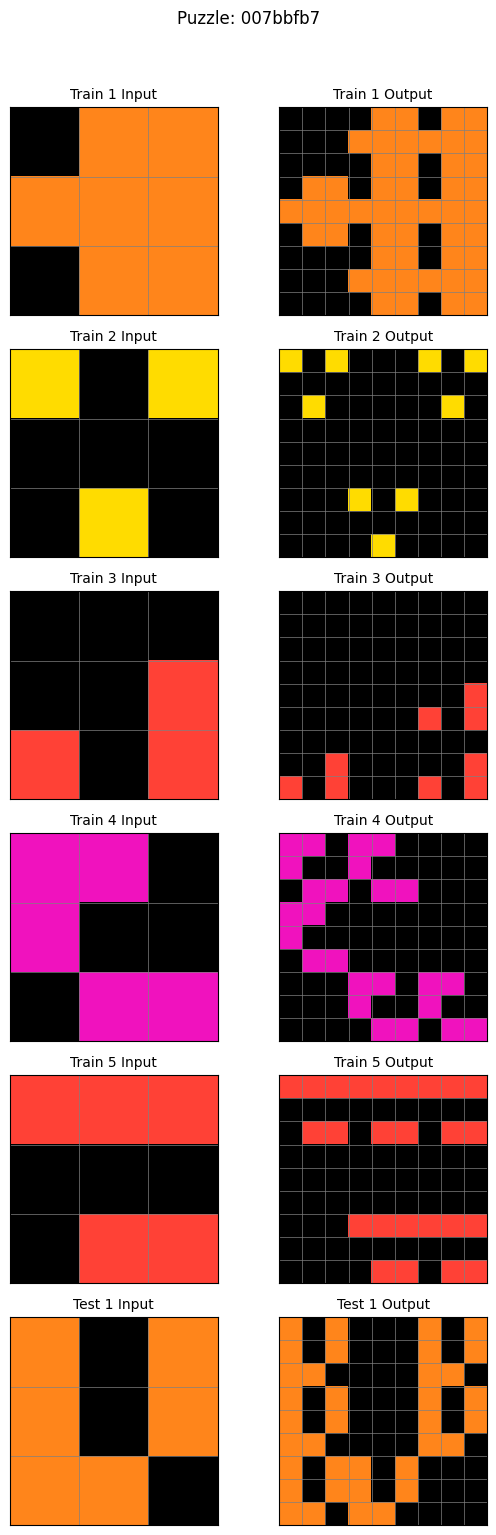

In [8]:
# Visualize first puzzle
puzzle_id = puzzle_ids[0]
print(f'Puzzle: {puzzle_id}')
plot_puzzle(train_challenges[puzzle_id], train_solutions[puzzle_id], f'Puzzle: {puzzle_id}')


Puzzle: 0520fde7


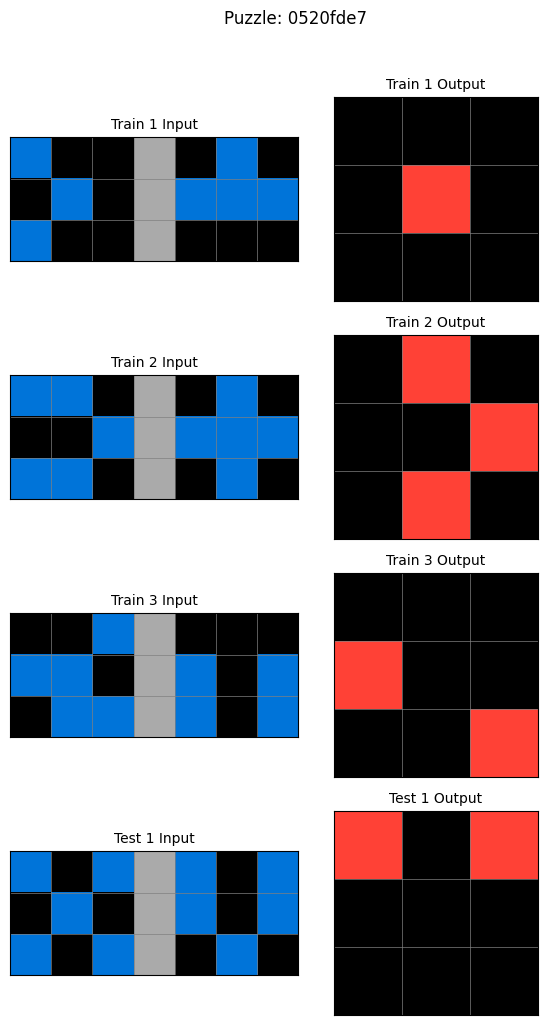


Puzzle: 09629e4f


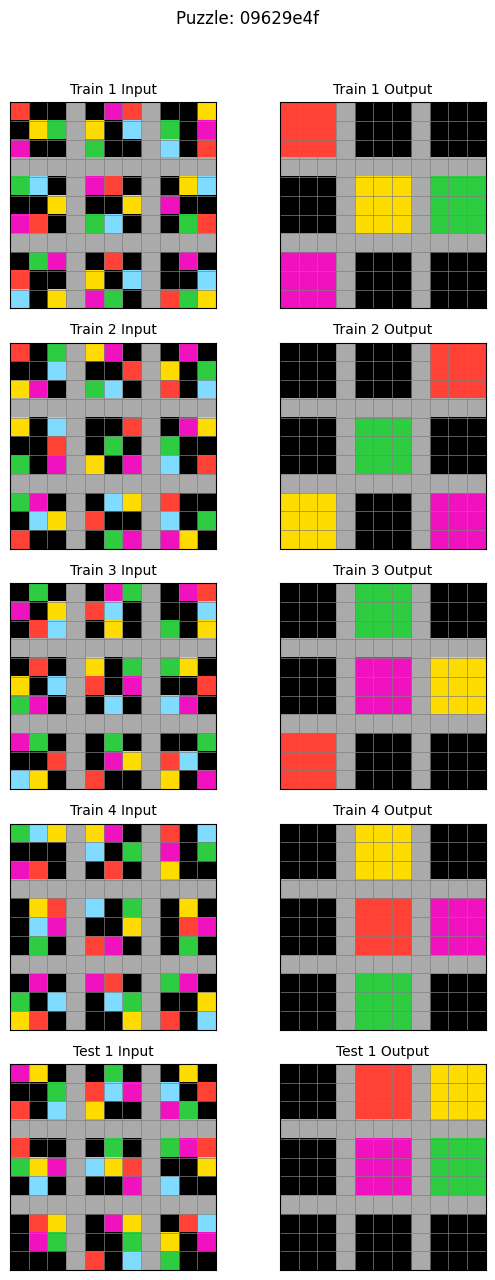


Puzzle: 25d487eb


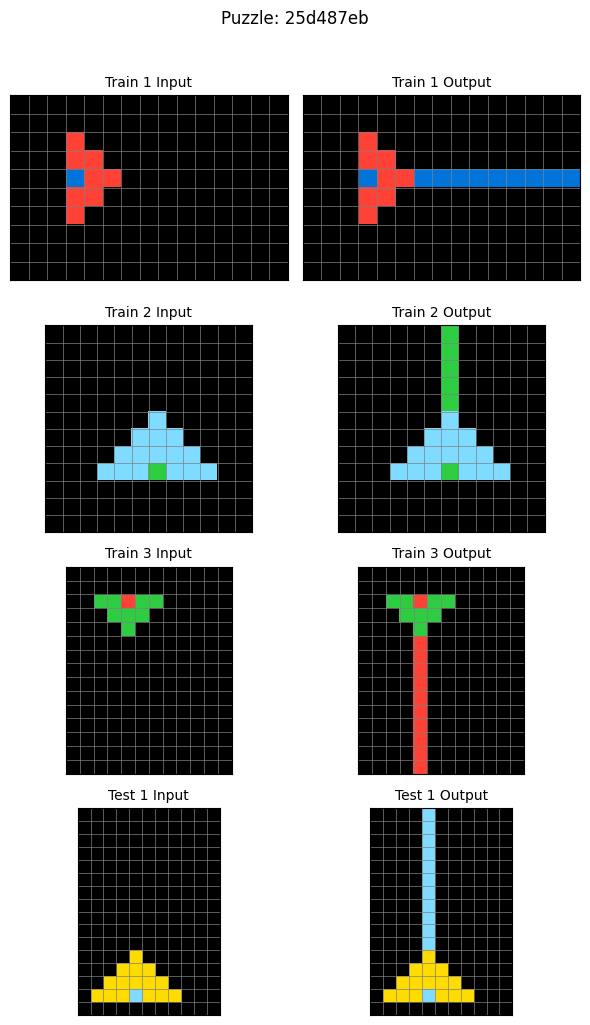

In [9]:
# Visualize a few more puzzles
for idx in [5, 10, 50]:
    puzzle_id = puzzle_ids[idx]
    print(f'\nPuzzle: {puzzle_id}')
    plot_puzzle(train_challenges[puzzle_id], train_solutions[puzzle_id], f'Puzzle: {puzzle_id}')

## 6. Grid Size Statistics

In [10]:
def get_grid_stats(challenges):
    """Compute statistics about grid sizes."""
    input_sizes = []
    output_sizes = []
    
    for puzzle in challenges.values():
        for ex in puzzle['train']:
            inp = np.array(ex['input'])
            out = np.array(ex['output'])
            input_sizes.append(inp.shape)
            output_sizes.append(out.shape)
        for ex in puzzle['test']:
            inp = np.array(ex['input'])
            input_sizes.append(inp.shape)
    
    return input_sizes, output_sizes

train_input_sizes, train_output_sizes = get_grid_stats(train_challenges)

print('=== Input Grid Sizes (Training) ===')
heights = [s[0] for s in train_input_sizes]
widths = [s[1] for s in train_input_sizes]
print(f'Height: min={min(heights)}, max={max(heights)}, mean={np.mean(heights):.1f}')
print(f'Width:  min={min(widths)}, max={max(widths)}, mean={np.mean(widths):.1f}')

print('\n=== Output Grid Sizes (Training) ===')
heights = [s[0] for s in train_output_sizes]
widths = [s[1] for s in train_output_sizes]
print(f'Height: min={min(heights)}, max={max(heights)}, mean={np.mean(heights):.1f}')
print(f'Width:  min={min(widths)}, max={max(widths)}, mean={np.mean(widths):.1f}')

=== Input Grid Sizes (Training) ===
Height: min=1, max=30, mean=10.4
Width:  min=2, max=30, mean=10.8

=== Output Grid Sizes (Training) ===
Height: min=1, max=30, mean=8.6
Width:  min=1, max=30, mean=8.9


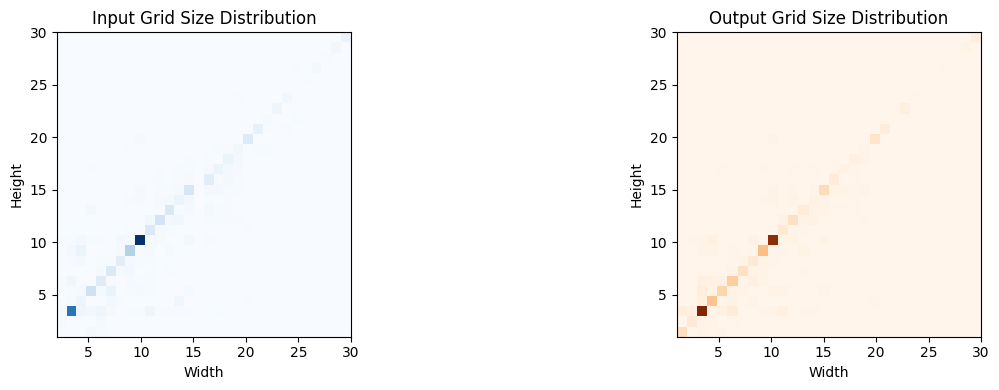

In [11]:
# Plot grid size distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Input sizes
input_h = [s[0] for s in train_input_sizes]
input_w = [s[1] for s in train_input_sizes]
axes[0].hist2d(input_w, input_h, bins=30, cmap='Blues')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Height')
axes[0].set_title('Input Grid Size Distribution')
axes[0].set_aspect('equal')

# Output sizes
output_h = [s[0] for s in train_output_sizes]
output_w = [s[1] for s in train_output_sizes]
axes[1].hist2d(output_w, output_h, bins=30, cmap='Oranges')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Height')
axes[1].set_title('Output Grid Size Distribution')
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

## 7. Examples per Puzzle Distribution

In [12]:
def count_examples(challenges):
    """Count train and test examples per puzzle."""
    train_counts = []
    test_counts = []
    
    for puzzle in challenges.values():
        train_counts.append(len(puzzle['train']))
        test_counts.append(len(puzzle['test']))
    
    return train_counts, test_counts

train_counts, test_counts = count_examples(train_challenges)

print('=== Train Examples per Puzzle ===')
counter = Counter(train_counts)
for count, freq in sorted(counter.items()):
    print(f'  {count} examples: {freq} puzzles ({100*freq/len(train_counts):.1f}%)')

print('\n=== Test Examples per Puzzle ===')
counter = Counter(test_counts)
for count, freq in sorted(counter.items()):
    print(f'  {count} examples: {freq} puzzles ({100*freq/len(test_counts):.1f}%)')

=== Train Examples per Puzzle ===
  2 examples: 56 puzzles (14.0%)
  3 examples: 237 puzzles (59.2%)
  4 examples: 78 puzzles (19.5%)
  5 examples: 18 puzzles (4.5%)
  6 examples: 5 puzzles (1.2%)
  7 examples: 3 puzzles (0.8%)
  8 examples: 2 puzzles (0.5%)
  10 examples: 1 puzzles (0.2%)

=== Test Examples per Puzzle ===
  1 examples: 386 puzzles (96.5%)
  2 examples: 12 puzzles (3.0%)
  3 examples: 2 puzzles (0.5%)


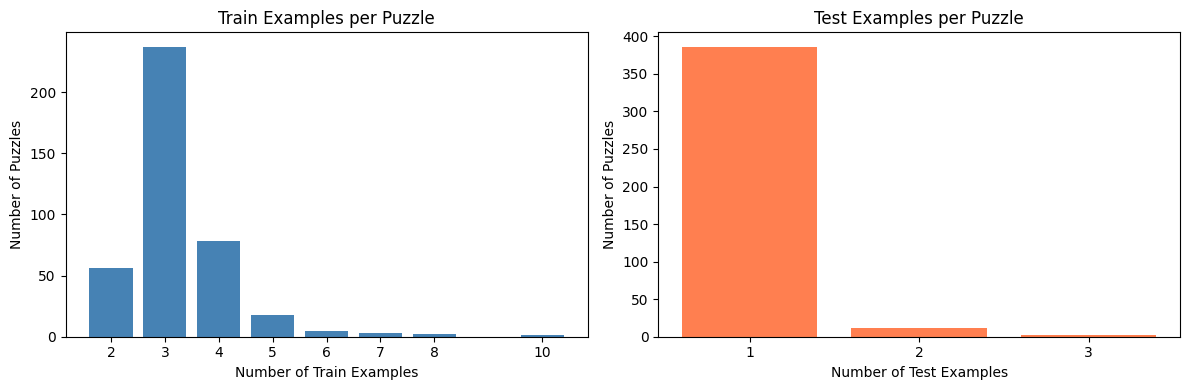

In [13]:
# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Train examples distribution
counter = Counter(train_counts)
axes[0].bar(counter.keys(), counter.values(), color='steelblue')
axes[0].set_xlabel('Number of Train Examples')
axes[0].set_ylabel('Number of Puzzles')
axes[0].set_title('Train Examples per Puzzle')
axes[0].set_xticks(list(counter.keys()))

# Test examples distribution
counter = Counter(test_counts)
axes[1].bar(counter.keys(), counter.values(), color='coral')
axes[1].set_xlabel('Number of Test Examples')
axes[1].set_ylabel('Number of Puzzles')
axes[1].set_title('Test Examples per Puzzle')
axes[1].set_xticks(list(counter.keys()))

plt.tight_layout()
plt.show()

## 8. Color Usage Statistics

In [14]:
def analyze_colors(challenges):
    """Analyze color usage across puzzles."""
    all_colors = Counter()
    colors_per_puzzle = []
    
    for puzzle in challenges.values():
        puzzle_colors = set()
        for ex in puzzle['train']:
            inp = np.array(ex['input'])
            out = np.array(ex['output'])
            puzzle_colors.update(inp.flatten())
            puzzle_colors.update(out.flatten())
            all_colors.update(inp.flatten())
            all_colors.update(out.flatten())
        for ex in puzzle['test']:
            inp = np.array(ex['input'])
            puzzle_colors.update(inp.flatten())
            all_colors.update(inp.flatten())
        colors_per_puzzle.append(len(puzzle_colors))
    
    return all_colors, colors_per_puzzle

color_counts, colors_per_puzzle = analyze_colors(train_challenges)

print('=== Color Usage (Training) ===')
total = sum(color_counts.values())
for color in range(10):
    count = color_counts.get(color, 0)
    pct = 100 * count / total
    bar = '█' * int(pct / 2)
    print(f'  Color {color}: {count:8d} ({pct:5.1f}%) {bar}')

print(f'\n=== Colors per Puzzle ===')
print(f'Min: {min(colors_per_puzzle)}, Max: {max(colors_per_puzzle)}, Mean: {np.mean(colors_per_puzzle):.1f}')

=== Color Usage (Training) ===
  Color 0:   229216 ( 59.3%) █████████████████████████████
  Color 1:    29220 (  7.6%) ███
  Color 2:    23846 (  6.2%) ███
  Color 3:    24404 (  6.3%) ███
  Color 4:    17801 (  4.6%) ██
  Color 5:    18490 (  4.8%) ██
  Color 6:     8244 (  2.1%) █
  Color 7:     5385 (  1.4%) 
  Color 8:    25530 (  6.6%) ███
  Color 9:     4427 (  1.1%) 

=== Colors per Puzzle ===
Min: 2, Max: 10, Mean: 6.0


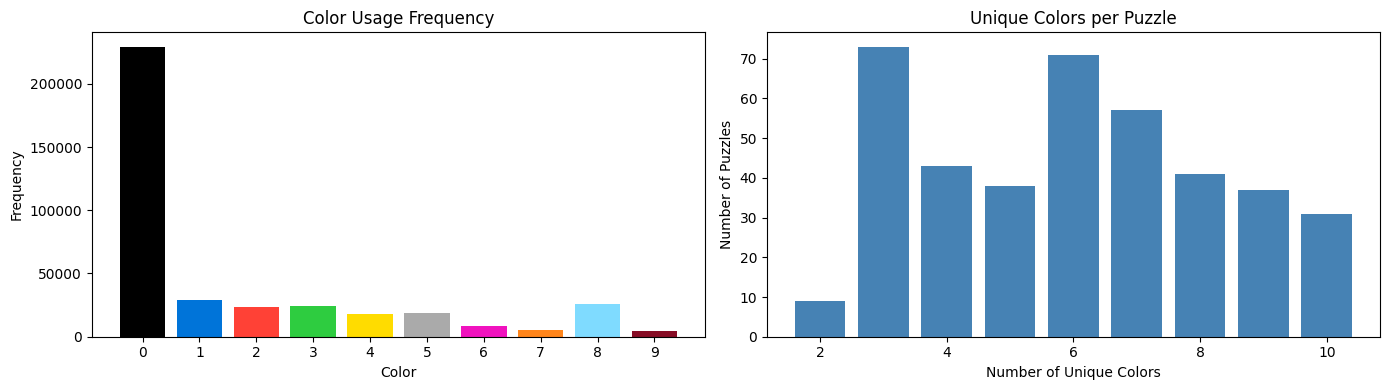

In [15]:
# Visualize color distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Color frequency
colors = list(range(10))
counts = [color_counts.get(c, 0) for c in colors]
bars = axes[0].bar(colors, counts, color=ARC_COLORS)
axes[0].set_xlabel('Color')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Color Usage Frequency')
axes[0].set_xticks(colors)

# Colors per puzzle
counter = Counter(colors_per_puzzle)
axes[1].bar(counter.keys(), counter.values(), color='steelblue')
axes[1].set_xlabel('Number of Unique Colors')
axes[1].set_ylabel('Number of Puzzles')
axes[1].set_title('Unique Colors per Puzzle')

plt.tight_layout()
plt.show()

## 9. Input/Output Size Relationships

In [16]:
def analyze_size_relationships(challenges):
    """Analyze how input and output sizes relate."""
    relationships = []
    
    for puzzle in challenges.values():
        for ex in puzzle['train']:
            inp = np.array(ex['input'])
            out = np.array(ex['output'])
            
            in_h, in_w = inp.shape
            out_h, out_w = out.shape
            
            relationships.append({
                'in_h': in_h, 'in_w': in_w,
                'out_h': out_h, 'out_w': out_w,
                'in_area': in_h * in_w,
                'out_area': out_h * out_w,
                'same_size': (in_h == out_h) and (in_w == out_w),
                'h_ratio': out_h / in_h,
                'w_ratio': out_w / in_w,
            })
    
    return relationships

relationships = analyze_size_relationships(train_challenges)

same_size = sum(1 for r in relationships if r['same_size'])
print(f'=== Size Relationships (Training) ===')
print(f'Same size (in == out): {same_size}/{len(relationships)} ({100*same_size/len(relationships):.1f}%)')

# Common size ratios
h_ratios = Counter(round(r['h_ratio'], 2) for r in relationships)
w_ratios = Counter(round(r['w_ratio'], 2) for r in relationships)

print(f'\nMost common height ratios (out/in):')
for ratio, count in h_ratios.most_common(5):
    print(f'  {ratio}x: {count} examples')

print(f'\nMost common width ratios (out/in):')
for ratio, count in w_ratios.most_common(5):
    print(f'  {ratio}x: {count} examples')

=== Size Relationships (Training) ===
Same size (in == out): 815/1302 (62.6%)

Most common height ratios (out/in):
  1.0x: 868 examples
  2.0x: 54 examples
  0.33x: 46 examples
  3.0x: 29 examples
  0.5x: 23 examples

Most common width ratios (out/in):
  1.0x: 882 examples
  2.0x: 58 examples
  0.33x: 38 examples
  0.43x: 27 examples
  0.5x: 23 examples


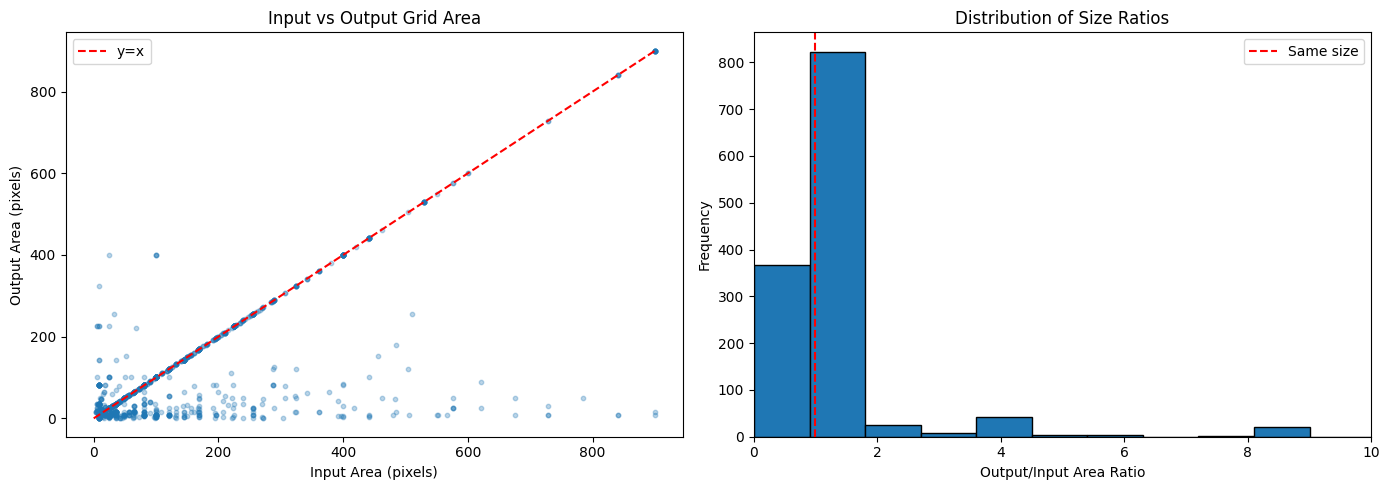

In [17]:
# Visualize size relationships
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Input vs Output area
in_areas = [r['in_area'] for r in relationships]
out_areas = [r['out_area'] for r in relationships]
axes[0].scatter(in_areas, out_areas, alpha=0.3, s=10)
axes[0].plot([0, max(in_areas)], [0, max(in_areas)], 'r--', label='y=x')
axes[0].set_xlabel('Input Area (pixels)')
axes[0].set_ylabel('Output Area (pixels)')
axes[0].set_title('Input vs Output Grid Area')
axes[0].legend()

# Size ratio distribution
area_ratios = [r['out_area'] / r['in_area'] for r in relationships]
axes[1].hist(area_ratios, bins=50, edgecolor='black')
axes[1].axvline(1.0, color='red', linestyle='--', label='Same size')
axes[1].set_xlabel('Output/Input Area Ratio')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Size Ratios')
axes[1].set_xlim(0, 10)
axes[1].legend()

plt.tight_layout()
plt.show()

## 10. Compare Splits

In [18]:
def get_split_summary(challenges, name):
    """Get summary statistics for a split."""
    train_counts = [len(p['train']) for p in challenges.values()]
    test_counts = [len(p['test']) for p in challenges.values()]
    
    all_sizes = []
    for puzzle in challenges.values():
        for ex in puzzle['train'] + puzzle['test']:
            inp = np.array(ex['input'])
            all_sizes.append(inp.shape[0] * inp.shape[1])
    
    return {
        'name': name,
        'n_puzzles': len(challenges),
        'avg_train': np.mean(train_counts),
        'avg_test': np.mean(test_counts),
        'avg_grid_area': np.mean(all_sizes),
    }

summaries = [
    get_split_summary(train_challenges, 'Training'),
    get_split_summary(eval_challenges, 'Evaluation'),
    get_split_summary(concept_challenges, 'Concept'),
]

print('=== Split Comparison ===')
print(f'{"Split":<12} {"Puzzles":>8} {"Avg Train":>10} {"Avg Test":>10} {"Avg Area":>10}')
print('-' * 52)
for s in summaries:
    print(f'{s["name"]:<12} {s["n_puzzles"]:>8} {s["avg_train"]:>10.1f} {s["avg_test"]:>10.1f} {s["avg_grid_area"]:>10.1f}')

=== Split Comparison ===
Split         Puzzles  Avg Train   Avg Test   Avg Area
----------------------------------------------------
Training          400        3.3        1.0      144.9
Evaluation        400        3.4        1.0      226.9
Concept           160        2.7        3.0      113.8


## 11. Sample Puzzles from Each Split

Training Sample: 44f52bb0


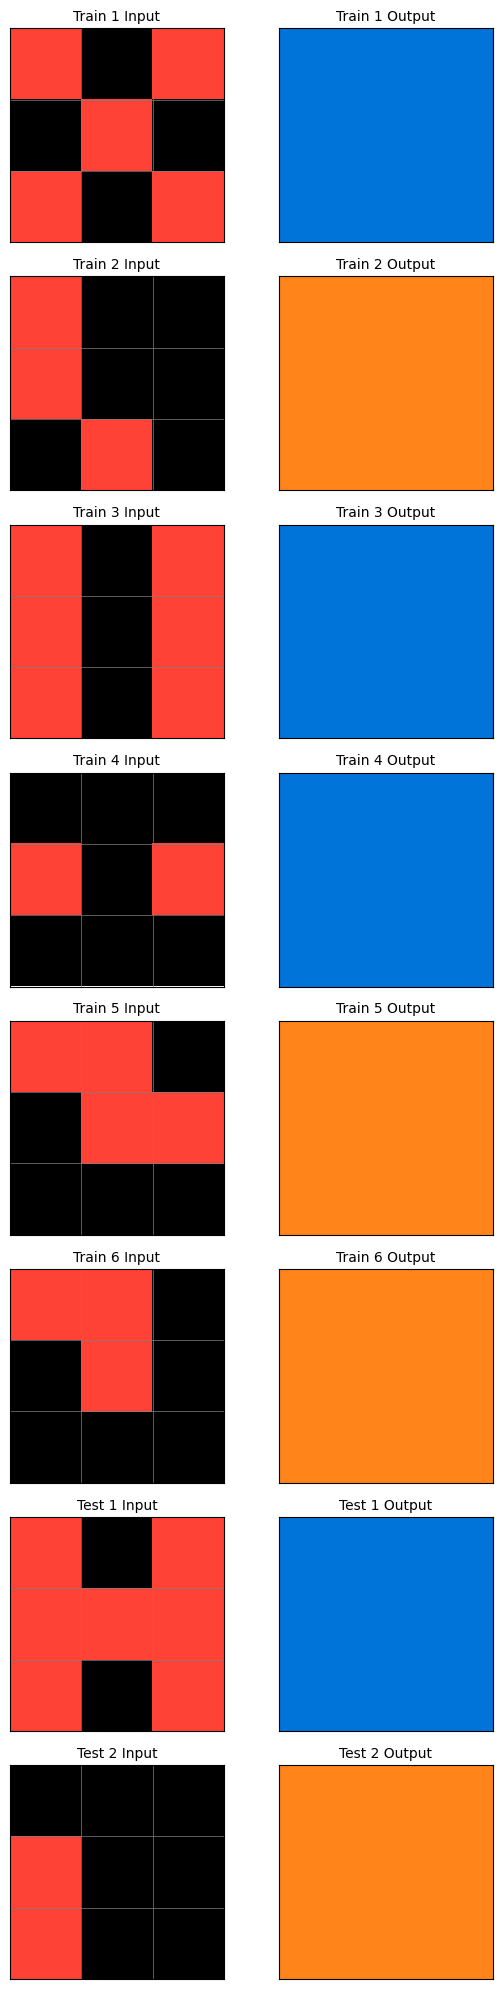

In [19]:
# Random sample from training
np.random.seed(42)
train_ids = list(train_challenges.keys())
sample_id = np.random.choice(train_ids)
print(f'Training Sample: {sample_id}')
plot_puzzle(train_challenges[sample_id], train_solutions[sample_id])

Evaluation Sample: e5790162


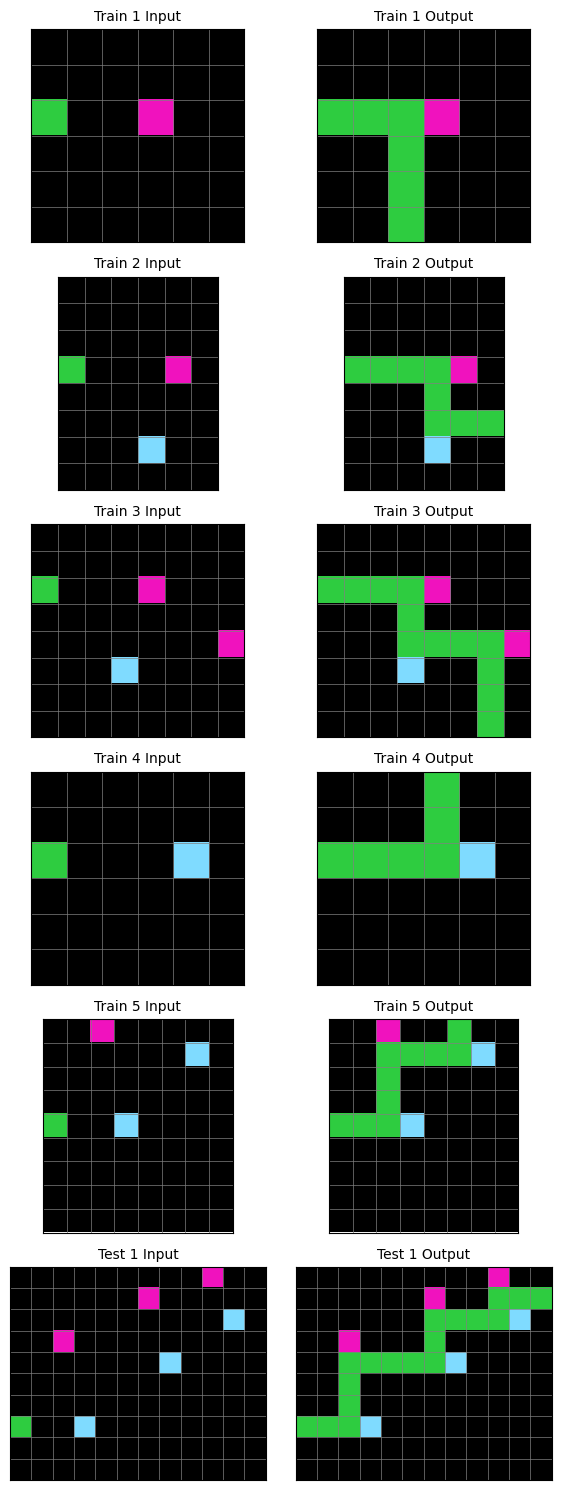

In [20]:
# Random sample from evaluation
eval_ids = list(eval_challenges.keys())
sample_id = np.random.choice(eval_ids)
print(f'Evaluation Sample: {sample_id}')
plot_puzzle(eval_challenges[sample_id], eval_solutions[sample_id])

Concept Sample: Count4


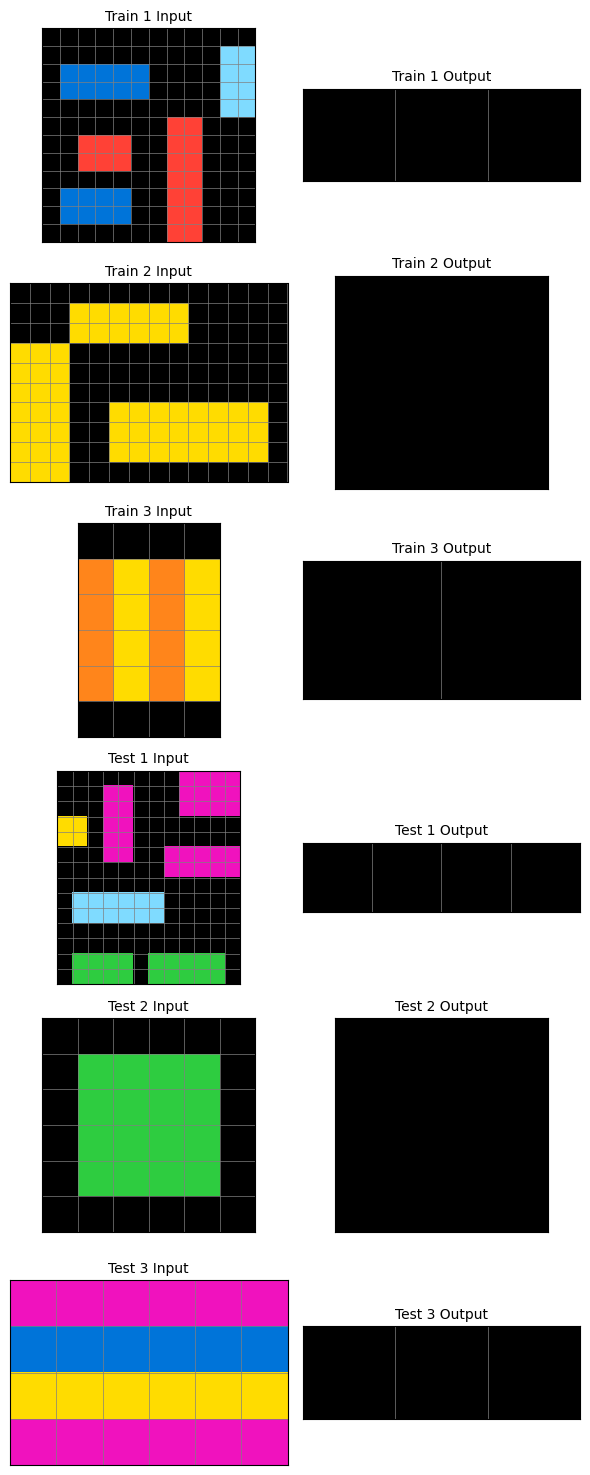

In [21]:
# Random sample from concept
concept_ids = list(concept_challenges.keys())
sample_id = np.random.choice(concept_ids)
print(f'Concept Sample: {sample_id}')
plot_puzzle(concept_challenges[sample_id], concept_solutions[sample_id])

## 12. Helper: Browse Puzzles Interactively

Split: train | Index: 42/399 | ID: 2281f1f4
Train examples: 3, Test examples: 1


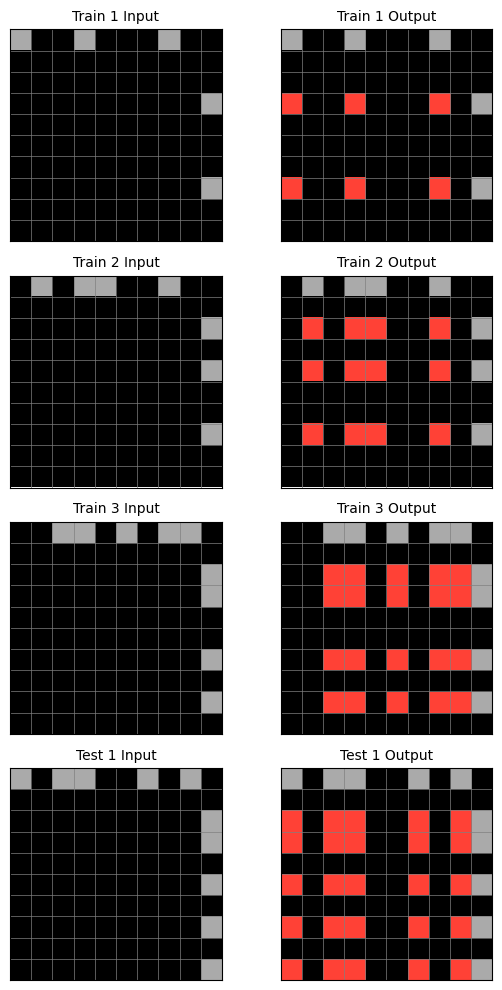

In [22]:
def browse_puzzle(split='train', index=0):
    """
    Browse a puzzle by split and index.
    
    Args:
        split: 'train', 'eval', or 'concept'
        index: puzzle index (0 to n_puzzles-1)
    """
    if split == 'train':
        challenges, solutions = train_challenges, train_solutions
    elif split == 'eval':
        challenges, solutions = eval_challenges, eval_solutions
    elif split == 'concept':
        challenges, solutions = concept_challenges, concept_solutions
    else:
        raise ValueError(f'Unknown split: {split}')
    
    puzzle_ids = list(challenges.keys())
    if index >= len(puzzle_ids):
        raise ValueError(f'Index {index} out of range (max: {len(puzzle_ids)-1})')
    
    puzzle_id = puzzle_ids[index]
    puzzle = challenges[puzzle_id]
    solution = solutions[puzzle_id]
    
    print(f'Split: {split} | Index: {index}/{len(puzzle_ids)-1} | ID: {puzzle_id}')
    print(f'Train examples: {len(puzzle["train"])}, Test examples: {len(puzzle["test"])}')
    plot_puzzle(puzzle, solution)

# Example usage
browse_puzzle('train', 42)